In [1]:
from prelim_calculations import Calculate
import pandas  as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import csv

start_date = datetime.datetime(2023, 1, 28, 0, 0).timetuple()
end_date = datetime.datetime(2023, 2, 3, 0, 0).timetuple()

Zabbix Credentials Accepted.


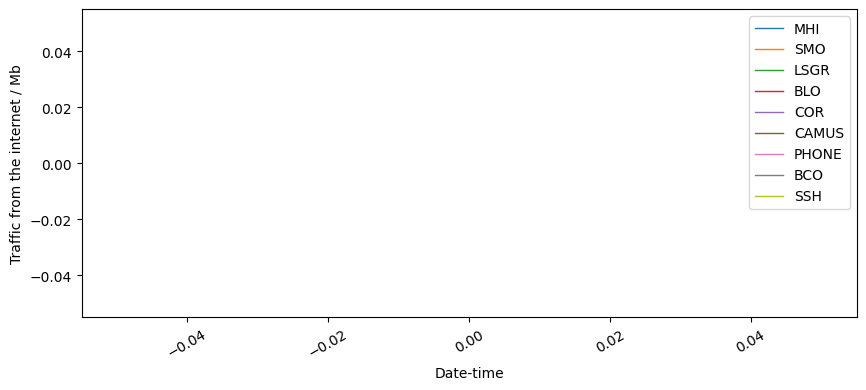

In [2]:
calc = Calculate(start_date, end_date)
demands = calc.get_demands()

data1 = demands[0]
data2 = demands[1]
data3 = demands[2]
data4 = demands[3]
data5 = demands[4]
data6 = demands[5]
data7 = demands[6]
data8 = demands[7]
data9 = demands[8]

#data1.update({'node':'mhi'})

#date_time = datetime.datetime.fromtimestamp(1674001644)

#plot the router-to-internet demand for 1: MHI, 2: SMO, 3:LSGR, 4:BLO, 5:COR

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(list(data1.keys()), list(data1.values()), linewidth=1.0)
ax.plot(list(data2.keys()), list(data2.values()), linewidth=1.0)
ax.plot(list(data3.keys()), list(data3.values()), linewidth=1.0)
ax.plot(list(data4.keys()), list(data4.values()), linewidth=1.0)
ax.plot(list(data5.keys()), list(data5.values()), linewidth=1.0)
ax.plot(list(data6.keys()), list(data6.values()), linewidth=1.0)
ax.plot(list(data7.keys()), list(data7.values()), linewidth=1.0)
ax.plot(list(data8.keys()), list(data8.values()), linewidth=1.0)     #large spike
ax.plot(list(data9.keys()), list(data9.values()), linewidth=1.0)

plt.xticks(rotation=30)
plt.xlabel("Date-time")
plt.ylabel("Traffic from the internet / Mb")
plt.legend(["MHI", "SMO", "LSGR", "BLO", "COR", "CAMUS", "PHONE", "BCO", "SSH"])

In [3]:
calc = Calculate(start_date, end_date)
demands = calc.get_demands()

fixed_demands = [{}, {}, {}, {}, {}, {}, {}, {}, {}]

for i in range(9):
    count = 1
    for key in demands[i].keys():
        tuple = (key, demands[i].get(key))
        fixed_demands[i].update({count : tuple})
        count += 1

#print(fixed_demands)


dict = {1: "MHI", 2: "SMO", 3: "LSGR", 4: "BLO", 5: "COR", 6: "CAMUS", 7: "PHONE", 8: "BCO", 9: "SSH"}

f = open("required-date.csv", "w")

for i in range(9):
    fixed_demands[i].update({"node" : dict.get(i + 1)})
    w = csv.DictWriter(f, fixed_demands[i].keys())
    w.writerow(fixed_demands[i])

f.close()

Zabbix Credentials Accepted.


In [4]:
# Retrieve Data for total traffic through MHI and SMO

calc = Calculate(start_date, end_date)

# Order is INT->MHI, MHI->INT, INT->SMO, SMO->INT
ids = ["47067","47118","47708","47852"]
token = calc.get_auth_token()

int_to_mhi = calc.build_request("47067", token, True)
mhi_to_int = calc.build_request("47118", token, True)
int_to_smo = calc.build_request("47708", token, True)
smo_to_int = calc.build_request("47852", token, True)


Zabbix Credentials Accepted.


Text(0.5, 1.0, 'Traffic from Tegola to HUBS')

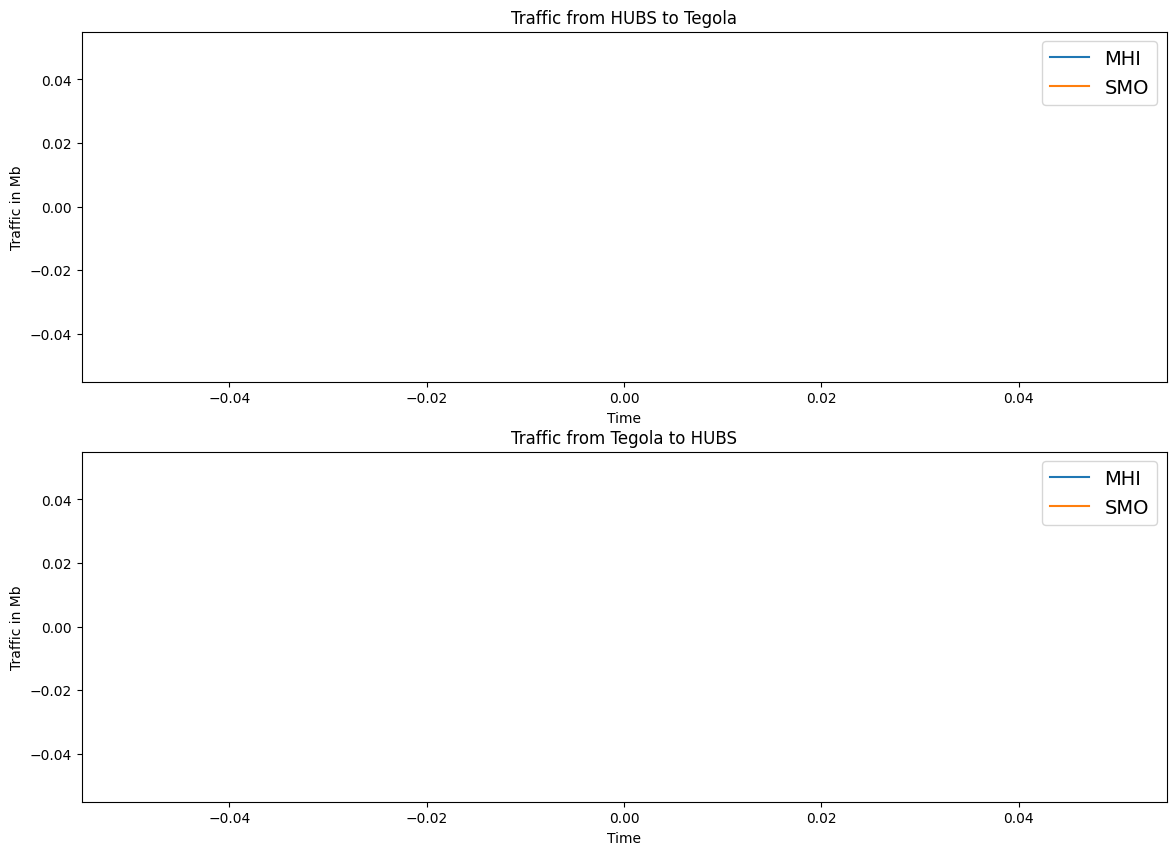

In [5]:
# Plot data for traffic between MHI and SMO for both upstream and downstream

fig, ax = plt.subplots(2, 1, figsize=(14,10))
ax[0].plot(int_to_mhi.keys(),int_to_mhi.values())
ax[0].plot(int_to_smo.keys(),int_to_smo.values())

ax[1].plot(mhi_to_int.keys(), mhi_to_int.values())
ax[1].plot(smo_to_int.keys(), smo_to_int.values())

ax[0].legend(["MHI", "SMO"],fontsize=14)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Traffic in Mb")
ax[0].set_title("Traffic from HUBS to Tegola")

ax[1].legend(["MHI", "SMO"],fontsize=14)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Traffic in Mb")
ax[1].set_title("Traffic from Tegola to HUBS")

In [6]:
# Links to find utilization on: MHI-COR, MHI-BLO, SMO-SGR, SGR-BCO

capacities = [147.05, 138.24, 583.68, 291.84]

ids = [["47065", "47116"], ["47070", "47121"], ["47857", "47713"], ["46358", "46403"]]

start_1 = datetime.datetime(2023, 1, 29, 18, 0).timetuple()
end_1 = datetime.datetime(2023, 1, 29, 23, 59).timetuple()

start_2 = datetime.datetime(2023, 1, 30, 18, 0).timetuple()
end_2 = datetime.datetime(2023, 1, 30, 23, 59).timetuple()

start_3 = datetime.datetime(2023, 1, 31, 18, 0).timetuple()
end_3 = datetime.datetime(2023, 1, 31, 23, 59).timetuple()

start_4 = datetime.datetime(2023, 2, 1, 18, 0).timetuple()
end_4 = datetime.datetime(2023, 2, 1, 23, 59).timetuple()

times = [start_1, start_2, start_3, start_4, end_1, end_2, end_3, end_4]

Zabbix Credentials Accepted.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Link Utilization Peak Times Comparison (18:00-23:59)')

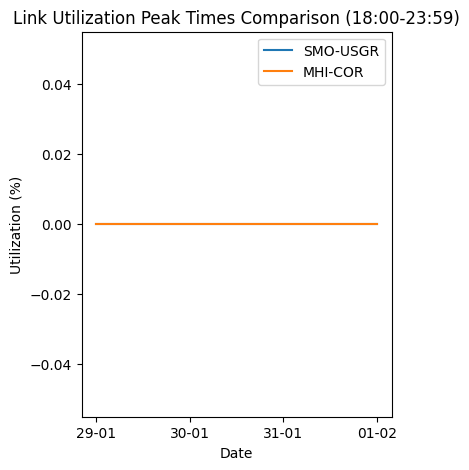

In [7]:
token = calc.get_auth_token()

fig, ax = plt.subplots(1, 1, figsize=(4,5))
daily_values = []

for id_set in ids:
    for i in range(int(len(times) / 2)):
        calc = Calculate(times[i], times[i + 4])
        data = calc.build_request(id_set, token, False)
        daily_value = (sum(list(data.values())) / 21600) * 100
        daily_values.append(daily_value)

print(daily_values)
mhi_cor = daily_values[0:4]
mhi_blo = daily_values[4:8]
smo_sgr = daily_values[8:12]
sgr_bco = daily_values[12:16]
dates = ['29-01','30-01','31-01', '01-02']
#ax[0].plot(one.keys(), values)

ax.plot(dates, smo_sgr)
ax.plot(dates, mhi_cor)
ax.legend(["SMO-USGR", "MHI-COR"],fontsize=10)
ax.set_xlabel("Date")
ax.set_ylabel("Utilization (%)")
ax.set_title("Link Utilization Peak Times Comparison (18:00-23:59)")
